<center><b>In the name of God</b></center>

<b>Course</b>: Statistical Pattern Recognition
<br>
<b>Description:</b> HomeWork 2 | Question 5
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

In [1]:
# Import Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
data = pd.read_csv("./blood_test.csv")

In [3]:
data

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [4]:
data["addicted"] = data["drinks"].apply(lambda x: x>5)

In [5]:
train_data = data[data["selector"]==1]
test_data = data[data["selector"]==2]

del train_data["drinks"]
del train_data["selector"]
del test_data["drinks"]
del test_data["selector"]

In [6]:
test_data

,mcv,alkphos,sgpt,sgot,gammagt,addicted
1,85,64,59,32,23,False
2,86,54,33,16,54,False
3,91,78,34,24,36,False
4,87,70,12,28,10,False
5,98,55,13,17,17,False
...,...,...,...,...,...,...
336,86,123,20,25,23,True
337,91,93,35,34,37,True
338,87,87,15,23,11,True
339,87,56,52,43,55,True


# a

In [87]:
NUMBER_SAMPLES = 100

In [88]:
CREATE_SAMPLES = False

if CREATE_SAMPLES:
    samples = train_data.sample(n=NUMBER_SAMPLES)
    samples.to_csv(f"./Samples/{NUMBER_SAMPLES}.csv")
else:
    samples = pd.read_csv(f"./Samples/{NUMBER_SAMPLES}.csv").drop(columns=["Unnamed: 0"])

In [89]:
class_data = []
class_data.append(samples[samples["addicted"] == False][["mcv", "alkphos", "sgpt", "sgot"]])
class_data.append(samples[samples["addicted"] == True][["mcv", "alkphos", "sgpt", "sgot"]])

In [90]:
class_mean = []
for data in class_data:
    class_mean.append(data.mean())
    
class_cov = []
for data in class_data:
    class_cov.append(data.cov())

# b

In [91]:
def p_likelihood(class_, test_item):
    mean = class_mean[class_]
    sigma = class_cov[class_].values
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    
    x = test_item[["mcv", "alkphos", "sgpt", "sgot"]]
    n = 4
    p = 1/((2*np.pi*sigma_det)**(n/2))*np.exp(-1/2* (x-mean).T @ sigma_inv @ (x-mean))
    
    return p

In [92]:
def predict_mle(test_item):
    return p_likelihood(0, test_item) < p_likelihood(1, test_item)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_list = []
predict_list = []
for index, test_item in test_data.iterrows():
    true_list.append(test_item["addicted"])
    predict_list.append(predict_mle(test_item))

print(f"Confusion Matrix:\n {confusion_matrix(true_list, predict_list)}")
print(f"Accuracy = {round(accuracy_score(true_list, predict_list)*100, 2)}%")
 

Confusion Matrix:
 [[145  12]
 [ 30  13]]
Accuracy = 79.0%


# c

In [94]:
class_prior = [len(samples[samples["addicted"] == False])/len(samples)
               , len(samples[samples["addicted"] == True])/len(samples)]

In [95]:
def predict_beyesian(test_item):
    if p_likelihood(0, test_item) * class_prior[0] < p_likelihood(1, test_item) * class_prior[1]:
        return True
    else:
        return False

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_list = []
predict_list = []
for index, test_item in test_data.iterrows():
    true_list.append(test_item["addicted"])
    predict_list.append(predict_beyesian(test_item))

print(f"Confusion Matrix:\n {confusion_matrix(true_list, predict_list)}")
print(f"Accuracy = {round(accuracy_score(true_list, predict_list)*100, 2)}%")

Confusion Matrix:
 [[146  11]
 [ 32  11]]
Accuracy = 78.5%


# d

In [101]:
for feature in ["mcv", "alkphos", "sgpt", "sgot"]:
    print(feature)
    for class_ in [0,1]:
        print(class_data[class_][feature].mean())
        print(class_data[class_][feature].var())

mcv
89.22857142857143
12.758592132505177
93.23333333333333
8.254022988505746
alkphos
72.01428571428572
305.08674948240173
70.83333333333333
515.1091954022988
sgpt
26.314285714285713
73.03022774327121
40.0
472.82758620689657
sgot
20.071428571428573
29.603519668737064
27.133333333333333
58.74022988505747


In [132]:
selected_features = ["sgpt", "alkphos"]

In [133]:
class_mean = []
for data in class_data:
    class_mean.append(data[selected_features].mean())
    
class_cov = []
for data in class_data:
    class_cov.append(data[selected_features].cov())

In [134]:
def p_likelihood(class_, test_item):
    mean = class_mean[class_]
    sigma = class_cov[class_].values
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    
    x = test_item[selected_features]
    n = 4
    p = 1/((2*np.pi*sigma_det)**(n/2))*np.exp(-1/2* (x-mean).T @ sigma_inv @ (x-mean))
    
    return p

In [135]:
def predict_mle(test_item):
    return p_likelihood(0, test_item) < p_likelihood(1, test_item)

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_list = []
predict_list = []
for index, test_item in test_data.iterrows():
    true_list.append(test_item["addicted"])
    predict_list.append(predict_mle(test_item))

print(f"Confusion Matrix:\n {confusion_matrix(true_list, predict_list)}")
print(f"Accuracy = {round(accuracy_score(true_list, predict_list)*100, 2)}%")

Confusion Matrix:
 [[147  10]
 [ 35   8]]
Accuracy = 77.5%


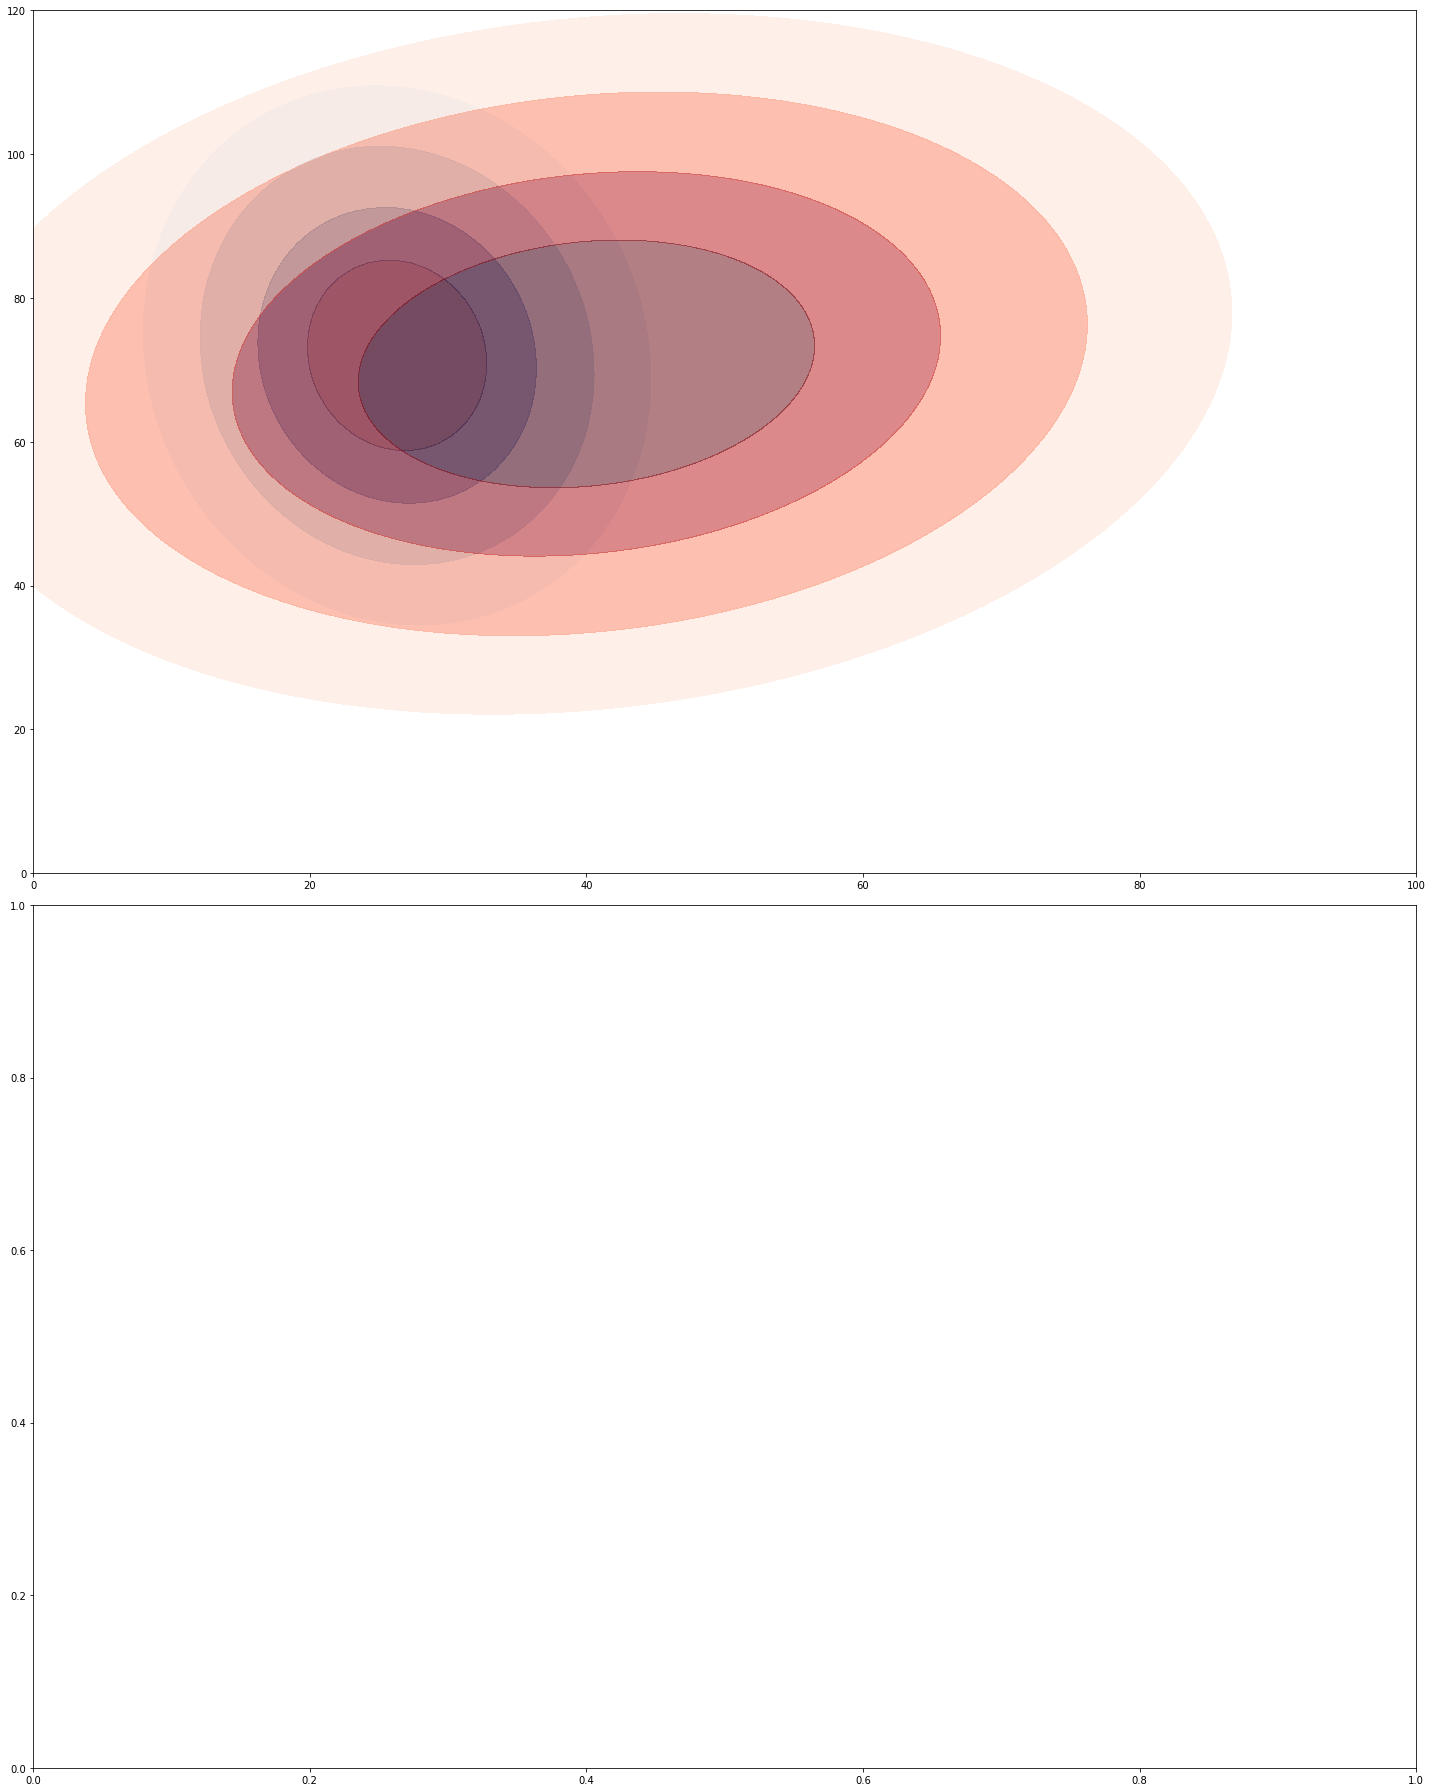

In [203]:
import numpy as np
size = 100

fig, axs = plt.subplots(2)

z_list = []
for class_ in [0, 1]:
    mean_x = class_data[class_][selected_features[0]].mean()
    mean_y = class_data[class_][selected_features[1]].mean()
    var_x = class_data[class_][selected_features[0]].var()
    var_y = class_data[class_][selected_features[1]].var()
    
    x = np.linspace(0, 100, size)
    y = np.linspace(0, 120, size)
    
    
    sigma = class_data[class_][selected_features].cov()
    
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    
    z = []
    
    for yi in y:
        zi = []
        for xi in x:
            xy_sub_mean = np.array([[xi-mean_x], [yi-mean_y]])        
            zij = np.exp(-1/2 * xy_sub_mean.T @ sigma_inv @ xy_sub_mean) / (2 * np.pi * np.sqrt(sigma_det))

            zi.append(float(zij))
            
        z.append(zi)
            
    z = np.array(z)

    z_list.append(z)
    
    xy_sub_mean = np.array([[mean_x-mean_x], [mean_y-mean_y]])        
    zij = np.exp(-1/2 * xy_sub_mean.T @ sigma_inv @ xy_sub_mean) / (2 * np.pi * np.sqrt(sigma_det))        
    

x, y = np.meshgrid(x, y)

# for z in z_list:
#     axs[class_].contourf(x, y, z, 100, cmap="YlOrRd", extend='max')

# axs[0].contourf(x,y,z_list[0], 100,[.25,.5,.75],alpha=.5,cmap='Greens',extend='max')
# axs[0].contourf(x,y,z_list[1], 100,alpha=1, cmap='Reds', linewidths=0.1, extend='max')

axs[0].contourf(x,y,z_list[0]/np.nanmax(z_list[0]),[0.10, .25,.5,.75],alpha=.5,cmap='Blues',extend='max')
axs[0].contourf(x,y,z_list[1]/np.nanmax(z_list[1]),[0.10, .25,.5,.75],alpha=.5,cmap='Reds',extend='max')


#     axs[class_].title.set_text(f"Class {class_} \n Mean = {[mean_x, mean_y]} \n Covariance = [{sigma[0]} {sigma[1]}]")    

# fig.delaxes(axs[4][2])
        
fig.set_size_inches(20,25)
fig.tight_layout()
plt.show()

(100, 100)